In [2]:
import numpy as np

## Задача 1. Стохастическая матрица и собственное значение равное 1.


Утверждение.
Пусть дана матрица $А$, в которой элементы неотрицательны и сумма в каждой строке равна $1 .$ Тогда 1 максимальное собственное значение такой матрицы.

Доказательство.
- Возьмём вектор $ \mathrm{v} $ из всех 1 и вычислим $ Av$.
- В силу равенства 1 суммы элементов в каждой строке $ Av$ также будет вектором из всех $1 .$
- Значит вектор $v$ собственный вектор для собственного значения 1
- Теперь воспользуемся теоремой Гершгорина: все собственные значения лежат в объединении кругов с центром в точках \$а_\{ii\}\$ и радиусом \$1 - а_\{ii\}\$
- Значит ни один из шаров не имеет точек расположенных дальше 1 и -1
- А значит и все собственные значения по модулю меньше 1

In [73]:
n = 100
m = 6
max_int = 10e5
A = np.zeros((n,m,m))
for i in range(n):
    for j in range(m):
        a = 0
        iter = 0
        while ((a != 1)and( max_int > iter)):
            raw = np.random.randint(10, size = (1,m))/10
            iter+=1
            a = np.sum(raw)
        A[i][j] = np.copy(raw)
        


for i in A:
    a = np.linalg.eigvals(i)
    print(np.max(a))

(0.9999999999999989+0j)
(1.0000000000000007+0j)
(1.000000000000001+0j)
(1.0000000000000009+0j)
(0.9999999999999986+0j)
(0.9999999999999992+0j)
(0.9999999999999998+0j)
(1.0000000000000004+0j)
(1+0j)
(0.9999999999999998+0j)
(0.9999999999999993+0j)
(0.9999999999999998+0j)
(1.0000000000000004+0j)
(0.9999999999999997+0j)
(0.9999999999999998+0j)
(0.9999999999999984+0j)
(0.9999999999999998+0j)
(1.0000000000000022+0j)
(1.0000000000000002+0j)
(1.0000000000000004+0j)
(1.0000000000000024+0j)
(0.9999999999999994+0j)
(1.0000000000000007+0j)
(0.9999999999999998+0j)
(1.0000000000000002+0j)
(0.9999999999999991+0j)
(1+0j)
(1.000000000000002+0j)
(0.9999999999999991+0j)
(0.9999999999999993+0j)
(0.9999999999999991+0j)
(0.9999999999999998+0j)
(1+0j)
(1+0j)
(1.0000000000000009+0j)
0.9999999999999987
(1+0j)
(0.9999999999999973+0j)
(0.9999999999999991+0j)
(1.000000000000001+0j)
(0.9999999999999989+0j)
(1+0j)
0.9999999999999999
(0.9999999999999989+0j)
(0.9999999999999996+0j)
(0.9999999999999978+0j)
(1.00000000

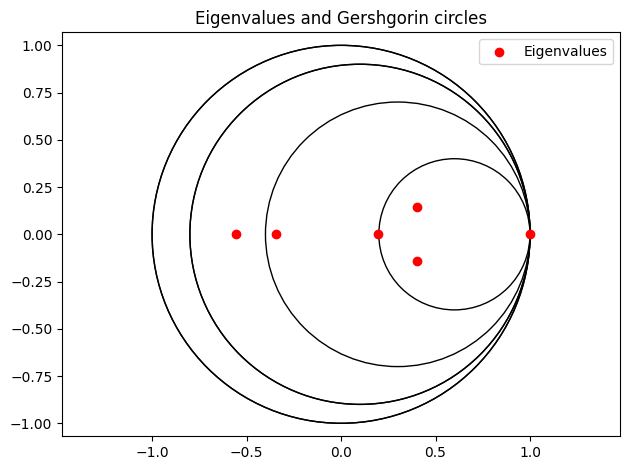

In [74]:
import matplotlib.pyplot as plt
%matplotlib inline
fig, ax = plt.subplots(1, 1)
a = A[0]
n = len(a[0])
xg = np.diag(a).real
yg = np.diag(a).imag
rg = np.zeros(n)
ev = np.linalg.eigvals(a)
for i in range(n):
    rg[i] = np.sum(np.abs(a[i, :])) - np.abs(a[i, i])
    crc = plt.Circle((xg[i], yg[i]), radius=rg[i], fill=False)
    ax.add_patch(crc)
plt.scatter(ev.real, ev.imag, color='r', label="Eigenvalues")
plt.axis('equal')
plt.legend()
ax.set_title('Eigenvalues and Gershgorin circles')
fig.tight_layout()

Сгенерируйте случайным образом много таких матриц и для каждой проверьте утверждение. Нарисуйте круги Гершгорина и собственные значения, воспользовавшись программой из документа семинара.

# Задача 2.  PageRank и степенные итерации.


Обычно вычисление собственных значений и собственных векторов необходимо для изучения
- вибраций в механических структурах
- снижения сложности моделей сложных систем

Более половины вычислительных мощностей в мире тратится на решение задач такого типа для задач.

Одна из самых известных задач о вычислении собственных векторов - задача о ранжировании $n$ веб-страниц (Google PageRank). Подход, который вам нужно будет реализовать в этой задаче, был одним из главных в работе Google на раннем этапе.

Всё, что мы собираемся использовать - структуру взаимных ссылок между страницами. PageRank определяется рекурсивно: важность $i$-й страницы определяется как среднее значение важностей всех страниц, которые ссылаются на $i$-ю. Обозначим важность $i$-й страницы $p_{i}$, тогда это определение может быть записано в виде линейной системы:
$$
p_{i}=\sum_{j} \frac{p_{j}}{L(j)} l_{i j}
$$
где $l_{i j}=1$ если $j$-я страница ссылается на $i$-ю (в противном случае $\left.l_{i j}=0\right)$, а $L(j)-$ количество исходящих ссылок со страницы $j$. Система может быть переписана в виде задачи на собственное значение:
$$
p=G p, \quad G_{i j}=\frac{l_{i j}}{L(j)}
$$
Если в графе есть 'подвешенные' узлы (все элементы какого-то столбца равны нулю), то весь столбед заполняется числом $1 / n$. Наконец, вводится параметр $0<\beta<1$ так что матрица $G$ заменяется на
$$
G \rightarrow \beta G+\frac{1-\beta}{n} e e^{T}
$$
где $e$ - вектор, состоящий из единиц. Обратите внимание, что задача свелась к нахождению собственного вектора $p$ матрицы $G$, отвечающего собственному значению $1 .$ Можно показать, что 1 - максимально возможное собственное значение матрицы $G .$
- Придумайте самостоятельно небольшой граф связности ( 10 узлов), постройте соответствуюшие матрицы $l$ и $G$ и найдите численно собственный вектор, отвечающий PageRank.



- Скачайте файл, в котором представлен ориентированный граф, узлы которого составляют страницы stanford.edu, а направленные рёбра - ссылки между ними (граф задан матрицей смежности $l$ ). Распакуйте архив и загрузите его:
- Найдите PageRank для матрицы из предыдущего пункта. Для этого реализуйте степенную итерацию для нахождения собственного вектора, отвечающего максимальному собственному значению $G .$ Возьмите $\beta=0.8$
- Итерируйте до тех пор, пока 1-норма изменения вектора-кандидата не станет меньше $10^{-4}$. Сколько итераций понадобилось?
- Какому собственному значению отвечает найденный вектор и у какого узла наибольший РаgеRапk?
- Докажите, что 1 - максимально возможное собственное значение матрицы G.

In [114]:
n = 10
beta = 0.9
d = np.random.randint(2, size = (n,n))
d = np.array(d, dtype = float)
for i in range(n):
    for j in range(n):
        if (j>=i):
            d[i][j] = 0

for i in range(n):
    for j in range(n):
        d[i][j] = d[j][i]


print(d)
for i in range(n):
    if (np.sum(d[:,i]) == 0):
        d[:,i] = 1/n
    else:
        d[:,i] = d[:,i]/np.sum(d[:,i])
print(d)
d = beta*d + (1 - beta)/n*np.ones((n,n))
eig_value = np.linalg.eig(d)[0]

for i in range(n):
    if (abs(eig_value[i] - 1) <= 1e-10):
        print(np.linalg.eig(d)[1][i])



[[0. 1. 1. 0. 0. 0. 1. 1. 0. 1.]
 [1. 0. 0. 1. 1. 0. 1. 0. 0. 0.]
 [1. 0. 0. 1. 0. 0. 1. 0. 0. 1.]
 [0. 1. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 1. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [1. 1. 1. 0. 1. 0. 0. 1. 0. 0.]
 [1. 0. 0. 0. 1. 0. 1. 0. 0. 1.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 1. 0. 0. 0. 0. 1. 0. 0.]]
[[0.         0.25       0.25       0.         0.         0.
  0.2        0.25       0.         0.33333333]
 [0.2        0.         0.         0.5        0.33333333 0.
  0.2        0.         0.         0.        ]
 [0.2        0.         0.         0.5        0.         0.
  0.2        0.         0.         0.33333333]
 [0.         0.25       0.25       0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.25       0.         0.         0.         0.
  0.2        0.25       0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         1.         0.        ]
 [0.2        0.25       0.2

In [275]:
data = pd.read_csv("1.csv", delimiter = ';', dtype = np.int32) # Не забудьте скачать файл
x = data['x']
y = data['y']
print(max(x))
n = max(y)
d = np.zeros((int(n/1000),int(n/1000)), dtype = np.float64)
for i in range(int(len(x)/1000)):
    for j in range(int(len(y)/1000)):
        if (((x[i] - 1) < int(n/1000)) and ((y[j] - 1) < int(n/1000))):
            d[x[i]-1,y[j]-1] = 1

for i in range(len(d)):
    for j in range(len(d)):
        d[i][j] = d[j][i]

n_1 = len(d)
for i in range(len(d)):
    if (np.sum(d[:,i]) == 0):
        d[:,i] = 1/n_1
    else:
        d[:,i] = d[:,i]/np.sum(d[:,i])
print(d)
d = beta*d + (1 - beta)/len(d)*np.ones((len(d),len(d)))
print(d)

281899
[[0.00355872 0.         0.         ... 0.00355872 0.00355872 0.00355872]
 [0.00355872 0.0625     1.         ... 0.00355872 0.00355872 0.00355872]
 [0.00355872 0.0625     0.         ... 0.00355872 0.00355872 0.00355872]
 ...
 [0.00355872 0.         0.         ... 0.00355872 0.00355872 0.00355872]
 [0.00355872 0.         0.         ... 0.00355872 0.00355872 0.00355872]
 [0.00355872 0.         0.         ... 0.00355872 0.00355872 0.00355872]]
[[3.55871886e-03 7.11743772e-04 7.11743772e-04 ... 3.55871886e-03
  3.55871886e-03 3.55871886e-03]
 [3.55871886e-03 5.07117438e-02 8.00711744e-01 ... 3.55871886e-03
  3.55871886e-03 3.55871886e-03]
 [3.55871886e-03 5.07117438e-02 7.11743772e-04 ... 3.55871886e-03
  3.55871886e-03 3.55871886e-03]
 ...
 [3.55871886e-03 7.11743772e-04 7.11743772e-04 ... 3.55871886e-03
  3.55871886e-03 3.55871886e-03]
 [3.55871886e-03 7.11743772e-04 7.11743772e-04 ... 3.55871886e-03
  3.55871886e-03 3.55871886e-03]
 [3.55871886e-03 7.11743772e-04 7.11743772e-04 ..

In [276]:
n = 0
eps = 1e-4
lam = 0
x_k = np.zeros((len(d),1))
x_k += 100
max_it = 100000

while ((np.linalg.norm(d@x_k - lam*x_k) > eps) and (n < max_it)):
    x_k1 = d@x_k
    x_k1 = x_k1/np.linalg.norm(x_k1)
    lam = x_k1.T@(d@x_k1)
    n+=1
    x_k = x_k1
print(x_k)
print(lam)

[[0.0367305 ]
 [0.35094905]
 [0.05427544]
 [0.05427544]
 [0.26411078]
 [0.26411078]
 [0.26411078]
 [0.09954355]
 [0.09954355]
 [0.22429823]
 [0.22429823]
 [0.1294446 ]
 [0.20704153]
 [0.14449947]
 [0.19052991]
 [0.19052991]
 [0.1749789 ]
 [0.0367305 ]
 [0.0367305 ]
 [0.0367305 ]
 [0.0367305 ]
 [0.0367305 ]
 [0.0367305 ]
 [0.0367305 ]
 [0.0367305 ]
 [0.0367305 ]
 [0.0367305 ]
 [0.0367305 ]
 [0.0367305 ]
 [0.0367305 ]
 [0.0367305 ]
 [0.0367305 ]
 [0.0367305 ]
 [0.0367305 ]
 [0.0367305 ]
 [0.0367305 ]
 [0.0367305 ]
 [0.0367305 ]
 [0.0367305 ]
 [0.0367305 ]
 [0.0367305 ]
 [0.0367305 ]
 [0.0367305 ]
 [0.0367305 ]
 [0.0367305 ]
 [0.0367305 ]
 [0.0367305 ]
 [0.0367305 ]
 [0.0367305 ]
 [0.0367305 ]
 [0.0367305 ]
 [0.0367305 ]
 [0.0367305 ]
 [0.0367305 ]
 [0.0367305 ]
 [0.0367305 ]
 [0.0367305 ]
 [0.0367305 ]
 [0.0367305 ]
 [0.0367305 ]
 [0.0367305 ]
 [0.0367305 ]
 [0.0367305 ]
 [0.0367305 ]
 [0.0367305 ]
 [0.0367305 ]
 [0.0367305 ]
 [0.0367305 ]
 [0.0367305 ]
 [0.0367305 ]
 [0.0367305 ]
 [0.03

In [241]:
n = 0
eps = 1e-4
lam = 0
x_k = np.zeros((len(d),1))
x_k += 100
max_it = 100000

while ((np.linalg.norm(d@x_k - lam*x_k) > eps) and (n < max_it)):
    x_k1 = d@x_k
    x_k1 = x_k1/np.linalg.norm(x_k1)
    lam = x_k1.T@(d@x_k1)
    n+=1
    x_k = x_k1
print(x_k)
print(lam)

def Hil(n):
    
    
def Lem(n):
    A = np.zeros((n,n))
    for i in range(n):
        for j in range(n):
            A[i,j] = min(i+1,j+1)/max(i+1,j+1)
    return A
def Pas(n):



[5]


# Задача 3. Метод обратных итераций и итерации Рэлея.


Напишите программу для нахождения минимального по модулю собственного значения и соответствующего собственного вектора симметричной матрицы при использовании обратных итераций Рэлея. С её помощью решите задачу для
- матрицы Гильберта
- матрицы Лемера
- матрицы Паскаля
- для симметричной трёхдиагональной матрицы, где на главной диагонали стоят 2, а на боковых диагоналях -1.

Напишите на основе этой программы функцию, которая ищет ближайшее к заданному числу собственное значение.


Для перечисленных матриц вывести ответ для n = 2, 3, ... 10.

Матрицей Лемера называют матрицу, у которой элементы равны:

$a_{i j}=\frac{\min (i, j)}{\max (i, j)} $ (нумерация от 1)

Матрицей Паскаля называют матрицу, у которой элементы равны:

$S_{i j}=\left(\begin{array}{l}
n \\
r
\end{array}\right)=\frac{n !}{r !(n-r) !}, \quad n=i+j, \quad r=i$  (нумерация от 0)

Примечание. Для некоторых матриц можно использовать также выражение обратной матрицы в явном виде.

 Матрица, обратная к матрице Гильберта, может быть выражена в явном виде через биномиальные коэффициенты:

$$
\left(H^{-1}\right)_{i j}=(-1)^{i+j}(i+j-1)\left(\begin{array}{c}
n+i-1 \\
n-j
\end{array}\right)\left(\begin{array}{c}
n+j-1 \\
n-i
\end{array}\right)\left(\begin{array}{c}
i+j-2 \\
i-1
\end{array}\right)^{2}
$$

где $n$ - порядок матрицы. Таким образом, элементы обратной матрицы $H^{-1}-$ целые числа.  

In [3]:
def bin(n, r):
    return fact(n)/(fact(r)*fact(n-r))
def fact(n):
    if ((n == 1) or (n == 0)):
        return 1
    else: return n*fact(n-1)
    
def Lem(n):
    A = np.zeros((n,n))
    for i in range(n):
        for j in range(n):
            A[i,j] = min(i+1,j+1)/max(i+1,j+1)
    return A
def Pas(n):
    A = np.zeros((n,n))
    for i in range(n):
        for j in range(n):
            l = i+j
            A[i,j] = fact(l)/(fact(i)*fact(l-i))
    return A

def Hil(n):
    A = np.zeros((n,n))
    for i in range(n):
        for j in range(n):
            A[i,j] = (-1)**(i+j+2)*(i+j+2-1)*bin(n+i+1-1,n-j-1)*bin(n+j+1-1,n-1-i)*bin(i+j-2+2,i+1-1)**2
    return A

def diag(n):
    A = np.zeros((n, n))
    idx = np.arange(n)
    A[idx, idx] = 2
    A[idx[:-1], idx[:-1]+1] = -1
    A[idx[1:], idx[1:]-1] = -1
    return A


In [36]:
eps = 0.01
lam = 1
count = 4
x_k = np.zeros((count,1)) + 1

x_k1 = np.zeros((count,1)) + 2
lam = 10
max_it = 100
A = diag(count)
print(np.linalg.eigvals(np.linalg.inv(A)))
n = 0

while ((np.linalg.norm(A@x_k1 - lam*x_k1) > eps) and (n < max_it)):
    
    x_k1 = (A@x_k)/np.linalg.norm(A@x_k)
    print(np.linalg.norm(A@x_k - lam*x_k))
    lam = x_k.T@A@x_k/(x_k.T@x_k)
    n+=1
    x_k = x_k1
print(n)
print(lam)


[2.61803399 0.7236068  0.38196601 0.2763932 ]
19.026297590440446
1.8027756377319943
0.6324555320336759
0.034299717028501785
4
[[2.61764706]]


# Задача 4.  PageRank с помощью библиотек на Python.

Мы можем вычислить PageRank с помощью библиотек на Python. Будем использовать бибилотеку networkx для работы с графами, она может быть установлена с помощью следующей команды

conda install networkx

Возьмём простой пример графа Zachary karate club. Этот граф был собран вручную в 1977, и является классическим графом для анализа соцсетей.
https://en.wikipedia.org/wiki/Zachary%27s_karate_club  

  

In [ ]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import networkx as nx
kn = nx.read_gml('graph.gml')
#nx.write_gml(kn, 'karate2.gml')
nx.draw_networkx(kn) #Draw the graph

Сейчас мы можем вычислить PageRank, используя функцию, встроенную в NetworkX. Мы также изобразим вершины графа пропорционально тому, наскольку они важны в смысле величины PageRank'a.

  

In [ ]:
pr = nx.algorithms.link_analysis.pagerank(kn)
pr_vector = list(pr.values())
pr_vector = np.array(pr_vector) * 3000
nx.draw_networkx(kn, node_size=pr_vector, labels=None)

Самостоятельно проделайте это всё для страниц stanford.edu

# Задача 5. Матрица вида диагональная матрица плюс матрица малого ранга.

- Собственные значения матрицы вида
$$
D+\rho u u^*
$$
вычислить не так просто!
- Характеристический многочлен имеет вид
$$
\operatorname{det}\left(D+\rho u u^*-\lambda I\right)=\operatorname{det}(D-\lambda I) \operatorname{det}\left(I+\rho(D-\lambda I)^{-1} u u^*\right)=0
$$
Тогда (докажите!!)
$$
\operatorname{det}\left(I+\rho(D-\lambda I)^{-1} u u^*\right)=1+\rho \sum_{i=1}^n \frac{\left|u_i\right|^2}{d_i-\lambda}=0
$$
Подсказка: найдите $\operatorname{det}\left(I+w u^*\right)$ используя два факта:
- $\operatorname{det}(C)=\prod_{i=1}^n \lambda_i(C)$
- $\operatorname{trace}(C)=\sum_{i=1}^n \lambda_i$.



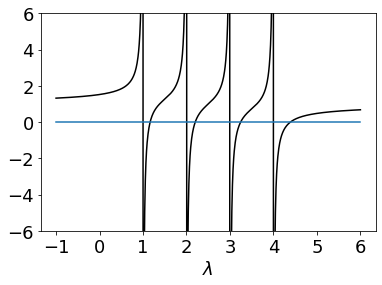

In [ ]:
import numpy as np

lm = [1, 2, 3, 4]
M = len(lm)
D = np.array(lm)
a = np.min(lm)
b = np.max(lm)
t = np.linspace(-1, 6, 1000)
u = 0.5 * np.ones(M)
rho = 1
def fun(lam):
    return 1 + rho * np.sum(u**2/(D - lam))
res = [fun(lam) for lam in t]
plt.plot(t, res, 'k')
plt.plot(t, np.zeros_like(t))
plt.ylim([-6, 6])
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
_ = plt.xlabel("$\lambda$", fontsize=18)

Эта функция имеет только один корень на каждом отрезке $\left[d_i, d_{i+1}\right]$

Мы показали справедливость теоремы Коши о чередовании (что происходит с собственными числами после внесения возмущения ранга 1).

Сформулируйте самостоятельно и докажите эту теорему.

# Задача 6. Нелинейное характеристическое уравнение.

Решите нелинейное уравнение для $\lambda$

$$
1+\rho \sum_{i=1}^n \frac{\left|u_i\right|^2}{d_i-\lambda}=0
$$

Указания:

- Метод Ньютона не сработает (изобразите касательные к графику , можно использовать графики из прошлой задачи).
- Заметим, что метод Ньютона - это по сути линейная аппроксимация функции $f(\lambda)$ на каждой итерации.
- Лучше аппроксимировать с помощью гиперболы вида:
$$
f(\lambda) \approx c_0+\frac{c_1}{d_i-\lambda}+\frac{c_2}{d_{i+1}-\lambda}
$$
- Для вычисления коэффициентов нам нужно вычислить $f(\lambda)$ и $f^{\prime}(\lambda)$ в некоторых точках.
- После чего получить апроксимацию из решения квадратного уравнения

# Задача 7. Теорема Лёвнера (Charles Loewner).

## Докажите теорему Лёвнера.

**Важный недостаток метода "разделяй и властвуй"**

- Устойчивость: этот метод игнорировали долгое время из-за неустойчивого вычисления собственных векторов.
- Нам нужно вычислить собственные векторы матрицы $D+\rho u u^*$.
- Точное выражение для собственных векторов $v_i$, для которых найдены собственные значения $\alpha_i$ :
$$
\left(D+\rho u u^*\right) v_i=\alpha_i v_i \quad\left(D-\alpha_i I\right) v_i+\rho\left(u^* v_i\right) u=0
$$
То есть $v_i \in \operatorname{span}\left(\left\{\left(D-\alpha_i I\right)^{-1} u\right\}\right)$

**Причины неустойчивости:**
- если есть два близких собственных числа $\alpha_i$ и $\alpha_{i+1}$, то соответствующие векторы $\left(D-\alpha_i I\right)^{-1} u$ и $\left(D-\alpha_{i+1} I\right)^{-1} u$ будут близки, хотя долждны быть ортогональны
- если $\alpha_i$ и $\alpha_{i+1}$ очень близки, то они близки к числу $d_i$ между ними, то есть матрицы $D-\alpha_i I$ и $D-\alpha_{i+1} I$ близки к вырожденным

**Теорема Лёвнера (Charles Loewner)**

- Решение проблемы неустойчивости можно получить с помощью теоремы Лёвнера:


Если $\alpha_i$ и $d_i$ удовлетворяют теореме о чередовании
$$
d_n<\alpha_n<\ldots<d_{i+1}<\alpha_{i+1} \ldots
$$
Тогда существует вектор $\widehat{u}$ такой что $\alpha_i$ - точное собственное значение матрицы
$$
\widehat{D}=D+\widehat{u} \widehat{u}^*
$$
и
$$
\widehat{u}_i^2=\frac{\prod_{j=1}^n\left(\alpha_j-d_i\right)}{\prod_{j=1, j \neq i}^n\left(d_j-d_i\right)}
$$
- Использование вектора $\widehat{u}$ вместо $u$ даёт устойчивое вычисление собственного вектора!
- Таким образом, сначала вычисляются собственные значения, затем $\widehat{u}$ и только потом собственные векторы.

# Задача 8. Верхне-гессенберговая форма

Напишите функцию, которая решает СЛАУ методом отражений Хаусхолдера.
И вторую функцию, которая приводит матрицу к верхне-гессенберговой форме.

## Пример работы алгоритма.

Решим для примера систему уравнений "вручную" методом отражений.

Система уравнений:

$$
\left\{\begin{array}{l}
x_1+x_2-x_3=1 \\
x_1-2 x_2+x_3=3 \\
3 x_1+2 x_2+x_3=4
\end{array}\right.
$$

Расширенная матрица системы:

$A^{(0)}=\left|\begin{array}{lrrr}1.00000 & 1.00000 & -1.0000 & 1.0000 \\ 1.0000 & -2.0000 & 1.0000 & 3.0000 \\ 3.0000 & 2.0000 & 1.0000 & 4.0000\end{array}\right|$
Шar $1, k=1$
$$
\begin{aligned}
&s=\left|\begin{array}{l}
1.0000 \\
1.0000 \\
3.0000
\end{array}\right|, \quad h=\left|\begin{array}{l}
1.0000 \\
0.0000 \\
0.0000
\end{array}\right| \\
&d=\sum_{i=1}^3 s_i^2=1^2+1^2+3^2=11, \quad b=\operatorname{sign}\left(a_{1,1}^{(0)}\right) \sqrt{d}=3.3166, \quad p=\sqrt{2(11+3.3166 \cdot 1.0000)}=5.3510
\end{aligned}
$$


\begin{aligned}
&w=\frac{1}{p}(s+b h)=\frac{1}{5.3510} \cdot\left(\left|\begin{array}{c}
1.0000 \\
1.0000 \\
3.0000
\end{array}\right|+3.3166 \cdot\left|\begin{array}{l}
1.0000 \\
0.0000 \\
0.0000
\end{array}\right|\right)=\left|\begin{array}{l}
0.8067 \\
0.1869 \\
0.5606
\end{array}\right| \\
&
\end{aligned}




\begin{aligned}
&U=E-2 w w^T=\left|\begin{array}{ccc}
1 & 0 & 0 \\
0 & 1 & 0 \\
0 & 0 & 1
\end{array}\right|-2 \cdot\left|\begin{array}{ll}
0.8067 \\
0.1869 \\
0.5606
\end{array}\right| \cdot|0.80670 .1869 \quad 0.5606|=\left|\begin{array}{rrr}
-0.3015 & -0.3015 & -0.9045 \\
-0.3015 & 0.9302 & -0.209 \\
-0.9045 & -0.2095 & 0.3714
\end{array}\right|, \\
&
\end{aligned}

$$A^{(1)}=U^{(1)} \cdot A^{(0)}=\left|\begin{array}{rrrr}
-0.3015 & -0.3015 & -0.9045 \\
-0.3015 & 0.9302 & -0.2095 \\
-0.9045 & -0.2095 & 0.3714
\end{array}\right| \cdot\left|\begin{array}{rrrr}
1.0000 & 1.00000 & -1.00000 & 1.0000 \\
1.0000 & -2.0000 & 1.0000 & 3.0000 \\
3.0000 & 2.0000  & 1.0000 & 4.0000
\end{array}\right|
=\left|\begin{array}{rrrr}
-3.3166 & -1.5076 & -0.9045 & -4.8242 \\
0.0000 & -2.5809 & 1.0221 & 1.6508 \\
0.0000 & 0.2573 & 1.0663 & -0.0477
\end{array}\right|$$



Шаг $2, k=2$
$$
\begin{aligned}
&s=\left|\begin{array}{r}
0.0000 \\
-2.5809 \\
0.2573
\end{array}\right|, h=\left|\begin{array}{l}
0.0000 \\
1.00000 \\
0.0000
\end{array}\right|, \\
&d=(-2.5809)^2+(0.2573)^2=6.7273, \quad b=\operatorname{sign}\left(a_{2,2}^{(1)}\right) \sqrt{d}=-2.5937, \\
&p=5.1810, w=\frac{1}{5.1810} \cdot\left(\left|\begin{array}{r}
0.0000 \\
-2.5809 \\
0.2573
\end{array}\right|-2.5937 \cdot\left|\begin{array}{l}
0.0000 \\
1.0000 \\
0.0000
\end{array}\right|\right)=\left|\begin{array}{r}
0.0000 \\
-0.9988 \\
0.0497
\end{array}\right|,
\end{aligned}
$$

$$U=\left|\begin{array}{lll}
1 & 0 & 0 \\
0 & 1 & 0 \\
0 & 0 & 1
\end{array}\right|-2 \cdot\left|\begin{array}{rrr}
0.0000 \\
-0.9988 \\
0.0497
\end{array}\right| \cdot|0.0000-0.99880 .0497|=\left|\begin{array}{rrr}
1.0000 & 0.0000 & -0.0000 \\
0.0000 & -0.9951 & 0.0992 \\
-0.0000 & 0.0992 & 0.9951
\end{array}\right| \text {, } $$

$$A^{(2)}=U^{(2)} \cdot A^{(1)}=  \left|\begin{array}{rrrr}
-3.3166 & -1.5076 & -0.9045 & -4.8242 \\
-0.0000 & 2.5937 & -0.9113 & -1.6473 \\
0.0000 & 0.0000 & 1.1625 & 0.1162
\end{array}\right|$$

По полученной расширенной матрице А ${ }^{(2)}$ запишем систему уравнений, эквивалентную исходной системе:
$$
\left\{\begin{array}{l}
-3.3166 \cdot x_1-1.5076 \cdot x_2-0.9045 \cdot x_3=-4.8242 \\
2.5937 \cdot x_2-0.9113 \cdot x_3=-1.6473 \\
1.1625 \cdot x_3=0.1162
\end{array}\right.
$$

из третьего уравнения находим $x_3$, подставляем его во второе уравнение, находим $x_2$, подставляем х ${ }_2$ и х в первое уравнение, и находим $x_1$. Получим
$$
x_1=1.7, x_2=-0.6, x_3=0.1
$$
по ссылке (формальный параметр с префиксом var).